In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings  
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("hotel_bookings.csv")

In [3]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
df1=pd.read_csv("hotel_bookings.csv",usecols=[3,4,6,7,8,26,27])
df1

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,customer_type,adr
0,2015,July,1,0,0,Transient,0.00
1,2015,July,1,0,0,Transient,0.00
2,2015,July,1,0,1,Transient,75.00
3,2015,July,1,0,1,Transient,75.00
4,2015,July,1,0,2,Transient,98.00
...,...,...,...,...,...,...,...
119385,2017,August,30,2,5,Transient,96.14
119386,2017,August,31,2,5,Transient,225.43
119387,2017,August,31,2,5,Transient,157.71
119388,2017,August,31,2,5,Transient,104.40


In [5]:
months = {'January':'01','February':'02','March':'03','April':'04','May':'05','June':'06','July':'07','August':'08','September':'09','October':'10','November':'11','December':'12'}

df1['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: months[x])
df1

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,customer_type,adr
0,2015,07,1,0,0,Transient,0.00
1,2015,07,1,0,0,Transient,0.00
2,2015,07,1,0,1,Transient,75.00
3,2015,07,1,0,1,Transient,75.00
4,2015,07,1,0,2,Transient,98.00
...,...,...,...,...,...,...,...
119385,2017,08,30,2,5,Transient,96.14
119386,2017,08,31,2,5,Transient,225.43
119387,2017,08,31,2,5,Transient,157.71
119388,2017,08,31,2,5,Transient,104.40


In [6]:
df1['arrival_date_month']=pd.to_numeric(df1.arrival_date_month)
#df1.dtypes
df1

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,customer_type,adr
0,2015,7,1,0,0,Transient,0.00
1,2015,7,1,0,0,Transient,0.00
2,2015,7,1,0,1,Transient,75.00
3,2015,7,1,0,1,Transient,75.00
4,2015,7,1,0,2,Transient,98.00
...,...,...,...,...,...,...,...
119385,2017,8,30,2,5,Transient,96.14
119386,2017,8,31,2,5,Transient,225.43
119387,2017,8,31,2,5,Transient,157.71
119388,2017,8,31,2,5,Transient,104.40


In [7]:
df1['date']=pd.to_datetime((df1.arrival_date_year*10000+df1.arrival_date_month*100+df1.arrival_date_day_of_month).apply(str),format='%Y%m%d')
df1

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,customer_type,adr,date
0,2015,7,1,0,0,Transient,0.00,2015-07-01
1,2015,7,1,0,0,Transient,0.00,2015-07-01
2,2015,7,1,0,1,Transient,75.00,2015-07-01
3,2015,7,1,0,1,Transient,75.00,2015-07-01
4,2015,7,1,0,2,Transient,98.00,2015-07-01
...,...,...,...,...,...,...,...,...
119385,2017,8,30,2,5,Transient,96.14,2017-08-30
119386,2017,8,31,2,5,Transient,225.43,2017-08-31
119387,2017,8,31,2,5,Transient,157.71,2017-08-31
119388,2017,8,31,2,5,Transient,104.40,2017-08-31


In [8]:
df1['weekdays']=df1['date'].dt.day_name()
df1

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,customer_type,adr,date,weekdays
0,2015,7,1,0,0,Transient,0.00,2015-07-01,Wednesday
1,2015,7,1,0,0,Transient,0.00,2015-07-01,Wednesday
2,2015,7,1,0,1,Transient,75.00,2015-07-01,Wednesday
3,2015,7,1,0,1,Transient,75.00,2015-07-01,Wednesday
4,2015,7,1,0,2,Transient,98.00,2015-07-01,Wednesday
...,...,...,...,...,...,...,...,...,...
119385,2017,8,30,2,5,Transient,96.14,2017-08-30,Wednesday
119386,2017,8,31,2,5,Transient,225.43,2017-08-31,Thursday
119387,2017,8,31,2,5,Transient,157.71,2017-08-31,Thursday
119388,2017,8,31,2,5,Transient,104.40,2017-08-31,Thursday


In [9]:
df1=df1.drop(['arrival_date_year',
       'arrival_date_month',
       'arrival_date_day_of_month'],axis=1)
df1

,stays_in_weekend_nights,stays_in_week_nights,customer_type,adr,date,weekdays
0,0,0,Transient,0.00,2015-07-01,Wednesday
1,0,0,Transient,0.00,2015-07-01,Wednesday
2,0,1,Transient,75.00,2015-07-01,Wednesday
3,0,1,Transient,75.00,2015-07-01,Wednesday
4,0,2,Transient,98.00,2015-07-01,Wednesday
...,...,...,...,...,...,...
119385,2,5,Transient,96.14,2017-08-30,Wednesday
119386,2,5,Transient,225.43,2017-08-31,Thursday
119387,2,5,Transient,157.71,2017-08-31,Thursday
119388,2,5,Transient,104.40,2017-08-31,Thursday


In [10]:
weekday_names=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_counts=df1.groupby("weekdays").mean()
weekday_counts=weekday_counts.loc[weekday_names]
weekday_counts

,stays_in_weekend_nights,stays_in_week_nights,adr
weekdays,,,
Monday,1.193055,2.480161,102.745802
Tuesday,0.335595,3.085792,100.636051
Wednesday,0.342958,2.898321,98.583838
Thursday,0.505869,2.755376,98.679109
Friday,0.760736,2.236106,105.520062
Saturday,1.467516,2.127389,102.134619
Sunday,1.956297,1.987908,104.328023


Text(0, 0.5, 'ADR')

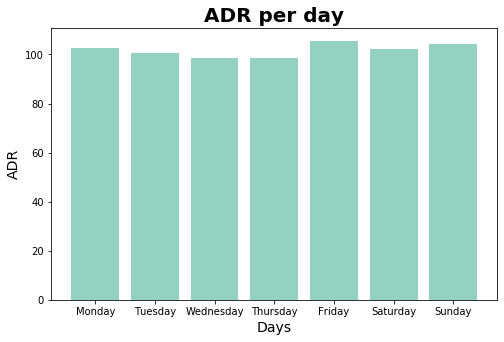

In [11]:
plt.figure(figsize=(8, 5))
plt.bar(weekday_names,weekday_counts['adr'],color=(0.3, 0.7, 0.6, 0.6))
plt.title('ADR per day',fontweight="bold", size=20)
plt.xlabel('Days', fontsize=14)
plt.ylabel('ADR', fontsize=14)

### ADR is max on friday

Text(0, 0.5, 'Night Stays')

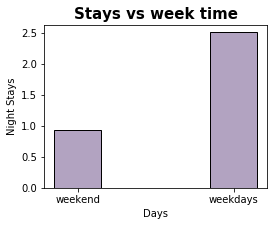

In [22]:
stay={'weekend':df1.stays_in_weekend_nights.mean(),'weekdays':df1.stays_in_week_nights.mean()}
keys = stay.keys()
values = stay.values()
plt.figure(figsize=(4, 3))
plt.bar(keys, values,color=(0.5, 0.4, 0.6, 0.6),width=0.3,ec="black",align='center')
plt.title('Stays vs week time',fontweight="bold", size=15)
plt.xlabel('Days', fontsize=10)
plt.ylabel('Night Stays', fontsize=10)

### Number of people staying at weekday nights are more than that of weekend nights

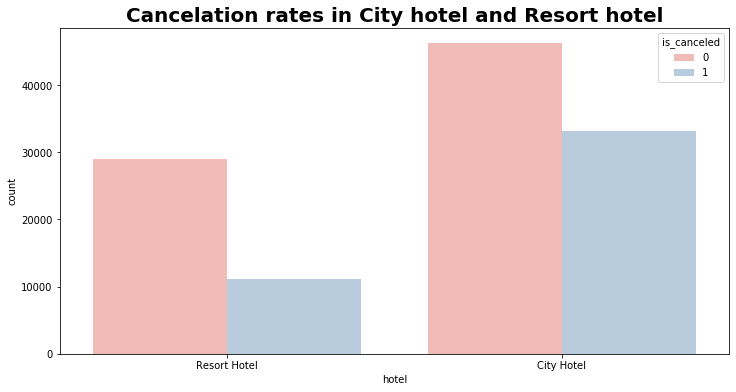

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='hotel',hue='is_canceled', data=df,palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=20)
plt.show()

### Most bookings were in city hotel
### Cancelations in Resort hotel is less compared to city hotel

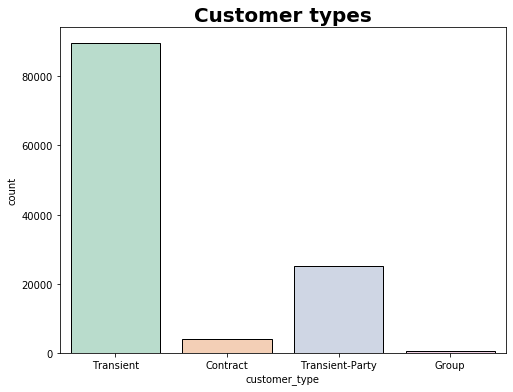

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='customer_type', data=df,palette='Pastel2',ec='black')
plt.title("Customer types",fontweight="bold", size=20)
plt.show()

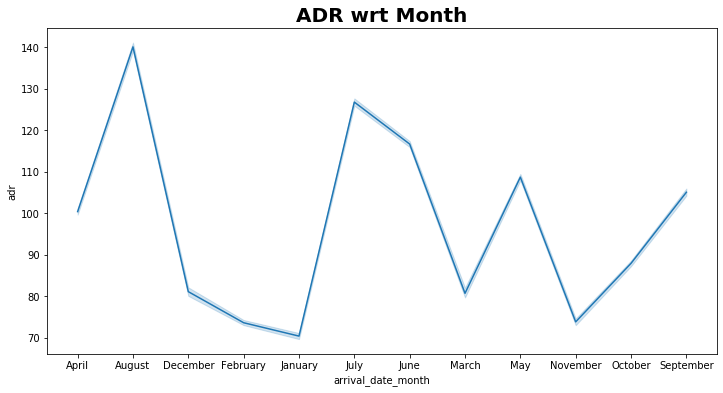

In [15]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr',  data= df)
plt.title("ADR wrt Month",fontweight="bold", size=20)
plt.show()

### ADR is more expensive during August.


In [16]:
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str)
df['arrival_date'] = df['arrival_date'].apply(pd.to_datetime)
df['reservation_status_date'] = df['reservation_status_date'].apply(pd.to_datetime)

In [17]:
cancelled_data = df[df['reservation_status'] == 'Canceled']
cancelled_data['canc_to_arrival_days'] = cancelled_data['arrival_date'] - cancelled_data['reservation_status_date']
cancelled_data['canc_to_arrival_days'] = cancelled_data['canc_to_arrival_days'].dt.days
cancelled_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,canc_to_arrival_days
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06,2015-07-01,56
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22,2015-07-01,70
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23,2015-07-01,8
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,NaN,0,Transient,107.0,0,2,Canceled,2015-05-11,2015-07-01,51
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,NaN,0,Transient,108.3,0,2,Canceled,2015-05-29,2015-07-01,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107997,City Hotel,1,13,2017,May,22,29,1,2,1,...,NaN,0,Transient,95.0,0,0,Canceled,2017-05-17,2017-05-29,12
108000,City Hotel,1,13,2017,May,22,29,1,2,1,...,NaN,0,Transient,95.0,0,0,Canceled,2017-05-17,2017-05-29,12
110280,City Hotel,1,132,2017,April,17,25,0,0,0,...,NaN,0,Transient,0.0,0,3,Canceled,2017-04-25,2017-04-25,0
111355,City Hotel,1,4,2017,June,23,5,1,0,1,...,238.0,0,Transient,65.0,0,0,Canceled,2017-06-05,2017-06-05,0


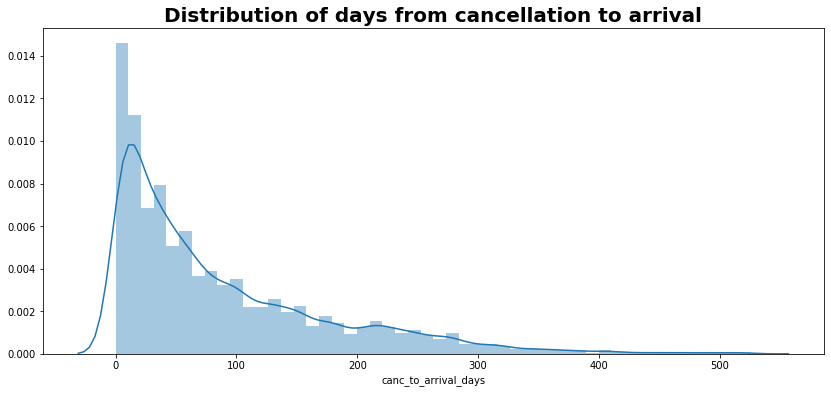

In [18]:
plt.figure(figsize=(14,6))
sns.distplot(cancelled_data['canc_to_arrival_days'])
plt.title("Distribution of days from cancellation to arrival",fontweight="bold", size=20)
plt.show()

In [19]:
print('Percentage of cancellations that are within a week of arrival: ', 
      (cancelled_data[cancelled_data['canc_to_arrival_days']<=7]['canc_to_arrival_days'].count()*100/cancelled_data['canc_to_arrival_days'].count()).round(2), '%')

Percentage of cancellations that are within a week of arrival:  11.94 %
